In [ ]:
#Import of Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
#Loading dataset into Google Colab environment

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving HAM.xlsx to HAM.xlsx
User uploaded file "HAM.xlsx" with length 24246 bytes


In [ ]:
#Viewing Dataset


df = pd.read_excel("HAM.xlsx")
df.head()


,Timestamp,Do you agree to participate in the survey?,1. What is your age group?,2. What is your gender?,3. How long have you been working at Nishat Mills Limited?,4. Which department or operational area do you work in?,"5. Are you aware of any operational efficiency practices followed in your daily work (e.g., waste reduction, machine maintenance, time management)?",6. Which of the following efficiency practices are commonly used in your department? (Select all that apply),7. How often are efficiency-related guidelines or instructions communicated to workers?,8. To what extent do you believe operational efficiency practices help in reducing production costs at NML?,"9. In your opinion, which area benefits the most from efficiency practices?",10. Do you feel your daily work practices directly contribute to cost savings for the company?,11. What are the main challenges that reduce operational efficiency in your work? (Select all that apply),12. How often do machine breakdowns affect production efficiency in your department?,13. Do you believe additional training would help reduce operational costs?,14. How open is the management to suggestions from front line workers regarding efficiency improvement?,15. Which of the following actions would most effectively improve operational efficiency and reduce costs at Nishat Mills Limited?
0,2025-12-22 13:02:56.509,Yes,18–25 years,Female,3–4 years,Dyeing / Processing,Yes,"Waste control or material reuse, Work scheduli...",Very frequently,To a great extent,"Reduced material wastage, Reduced energy consu...",Strongly agree,"Old or inefficient machinery, Lack of proper t...",Often,Agree,Somewhat open,Upgrading or timely maintenance of machinery
1,2025-12-22 13:11:11.014,Yes,26–33 years,Female,5–7 years,Spinning,Yes,"Standard operating procedures (SOPs), Waste co...",Frequently,To some extent,"Lower machine breakdown costs, Reduced energy ...",Agree,"Old or inefficient machinery, Poor communication",Often,Agree,Neutral,Better communication between workers and super...
2,2025-12-22 13:16:54.081,Yes,34–41 years,Prefer not to say,3–4 years,Finishing,Yes,"Preventive machine maintenance, Waste control ...",Frequently,To a small extent,"Lower machine breakdown costs, Reduced energy ...",Agree,"Old or inefficient machinery, Lack of proper t...",Often,Disagree,Somewhat open,Introducing incentives or rewards for efficien...
3,2025-12-22 13:23:49.344,Yes,18–25 years,Male,5–7 years,Weaving,Yes,"Waste control or material reuse, Work scheduli...",Frequently,To a small extent,"Reduced material wastage, Improved labour prod...",Agree,"Old or inefficient machinery, Lack of proper t...",Often,Neutral,Not very open,Regular skill development and training for fro...
4,2025-12-22 13:30:13.646,Yes,34–41 years,Female,3–4 years,Finishing,Yes,"Waste control or material reuse, Work scheduli...",Rarely,To some extent,"Lower machine breakdown costs, Reduced energy ...",Strongly agree,"Old or inefficient machinery, Work pressure or...",Often,Agree,Neutral,Improving work planning and scheduling


In [ ]:
likert_map = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5,
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Very Often': 5
}

df_encoded = df.replace(likert_map)


In [ ]:
efficiency_cols = [
    '7. How often are efficiency-related guidelines or instructions communicated to workers?',
    '12. How often do machine breakdowns affect production efficiency in your department?'
]

cost_cols = [
    '8. To what extent do you believe operational efficiency practices help in reducing production costs at NML?',
    '10. Do you feel your daily work practices directly contribute to cost savings for the company?',
    '13. Do you believe additional training would help reduce operational costs?'
]

df_encoded[efficiency_cols + cost_cols] = df_encoded[
    efficiency_cols + cost_cols
].apply(pd.to_numeric, errors='coerce')

df_encoded['Operational_Efficiency'] = df_encoded[efficiency_cols].mean(axis=1)
df_encoded['Cost_Reduction'] = df_encoded[cost_cols].mean(axis=1)


In [ ]:
likert_cols = efficiency_cols + cost_cols
df[likert_cols] = df[likert_cols].replace(likert_map)

In [ ]:
# descriptive statistics

df[likert_cols].describe()

,7. How often are efficiency-related guidelines or instructions communicated to workers?,12. How often do machine breakdowns affect production efficiency in your department?,8. To what extent do you believe operational efficiency practices help in reducing production costs at NML?,10. Do you feel your daily work practices directly contribute to cost savings for the company?,13. Do you believe additional training would help reduce operational costs?
count,160,160,160,160,160
unique,4,5,5,4,5
top,Frequently,4,To some extent,4,4
freq,80,93,51,104,86


In [ ]:
df[likert_cols] = df[likert_cols].apply(pd.to_numeric, errors='coerce')

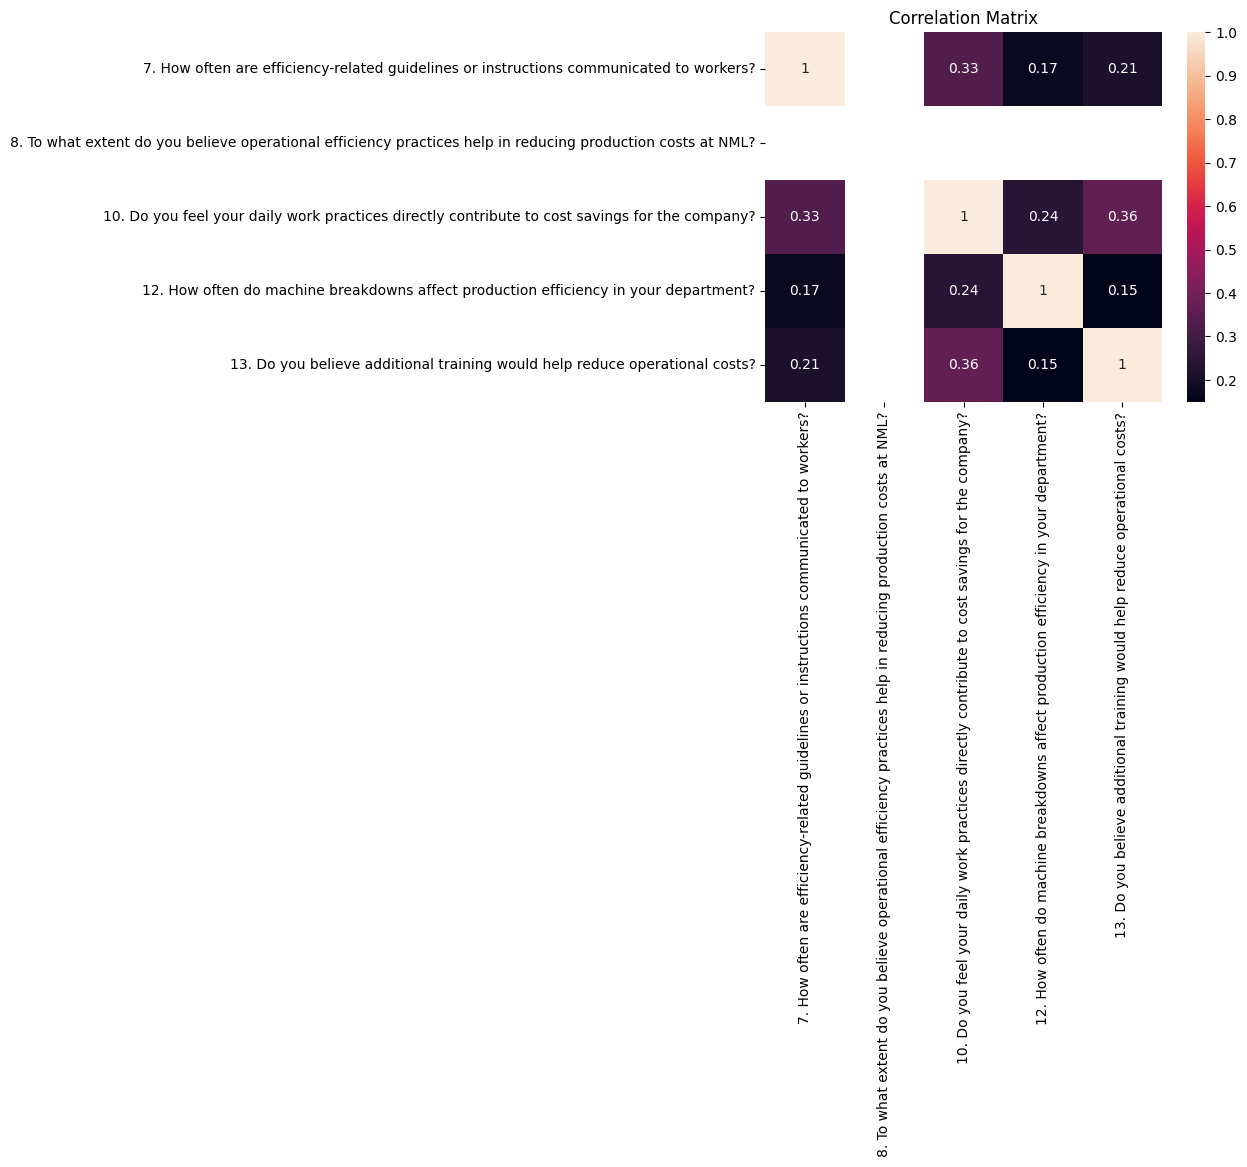

In [ ]:
#Confusion Matrix

plt.figure()
sns.heatmap(df[likert_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Results of OLS Regression


regression_df = df_encoded[['Operational_Efficiency', 'Cost_Reduction']].dropna()


X = sm.add_constant(regression_df['Operational_Efficiency'])
Y = regression_df['Cost_Reduction']


model = sm.OLS(Y, X).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Cost_Reduction   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     13.06
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           0.000446
Time:                        06:13:33   Log-Likelihood:                -85.731
No. Observations:                 119   AIC:                             175.5
Df Residuals:                     117   BIC:                             181.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [ ]:

likert_map = {
    'Strongly disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly agree': 5,
    'Never': 1, 'Rarely': 2, 'Occasionally': 3, 'Sometimes': 3, 'Frequently': 4, 'Often': 4, 'Very often': 5, 'Very frequently': 5,
    'Not at all': 1, 'To a small extent': 2, 'To some extent': 3, 'To a great extent': 4, 'To a very great extent': 5,
    'Not open at all': 1, 'Not very open': 2, 'Somewhat open': 4, 'Very open': 5
}
df_encoded = df.copy()
df_encoded = df_encoded.replace(likert_map)
df_encoded = df_encoded.infer_objects(copy=False)

efficiency_cols = [
    '7. How often are efficiency-related guidelines or instructions communicated to workers?',
    '12. How often do machine breakdowns affect production efficiency in your department?'
]
cost_cols = [
    '8. To what extent do you believe operational efficiency practices help in reducing production costs at NML?',
    '10. Do you feel your daily work practices directly contribute to cost savings for the company?',
    '13. Do you believe additional training would help reduce operational costs?'
]

for col in efficiency_cols + cost_cols:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

df_encoded = df_encoded.dropna(subset=efficiency_cols + cost_cols)

df_encoded['Operational_Efficiency'] = df_encoded[efficiency_cols].mean(axis=1)
df_encoded['Cost_Reduction_Target'] = df_encoded[cost_cols].mean(axis=1)

demo_cols = [
    '1. What is your age group?',
    '2. What is your gender?',
    '3. How long have you been working at Nishat Mills Limited?',
    '4. Which department or operational area do you work in?'
]

X_cat = pd.get_dummies(df_encoded[demo_cols], drop_first=True)
X = pd.concat([df_encoded[['Operational_Efficiency']], X_cat], axis=1)
y = df_encoded['Cost_Reduction_Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/tmp/ipython-input-3816355161.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace(likert_map)


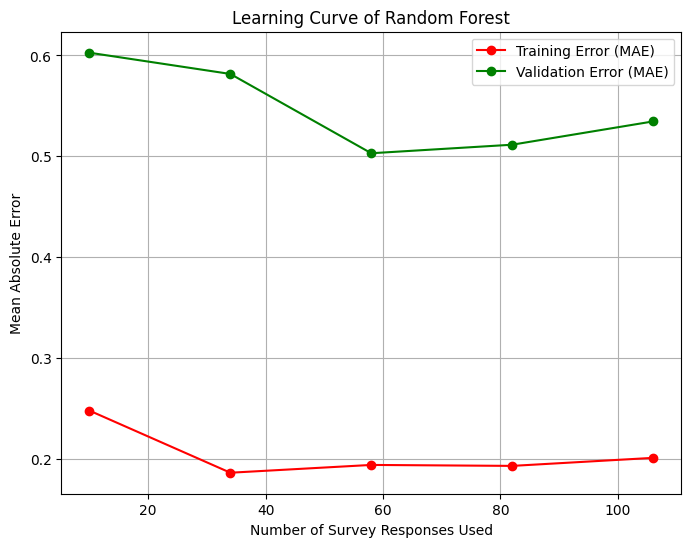

In [ ]:
# Trainining and Evaluation of Random Forest as ML Model in terms of Learning Curve

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, X=X, y=y, cv=3, scoring='neg_mean_absolute_error',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Error (MAE)")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation Error (MAE)")
plt.title("Learning Curve of Random Forest")
plt.xlabel("Number of Survey Responses Used")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Mean Absolute Error: 0.5868
R-squared Score: -0.1532


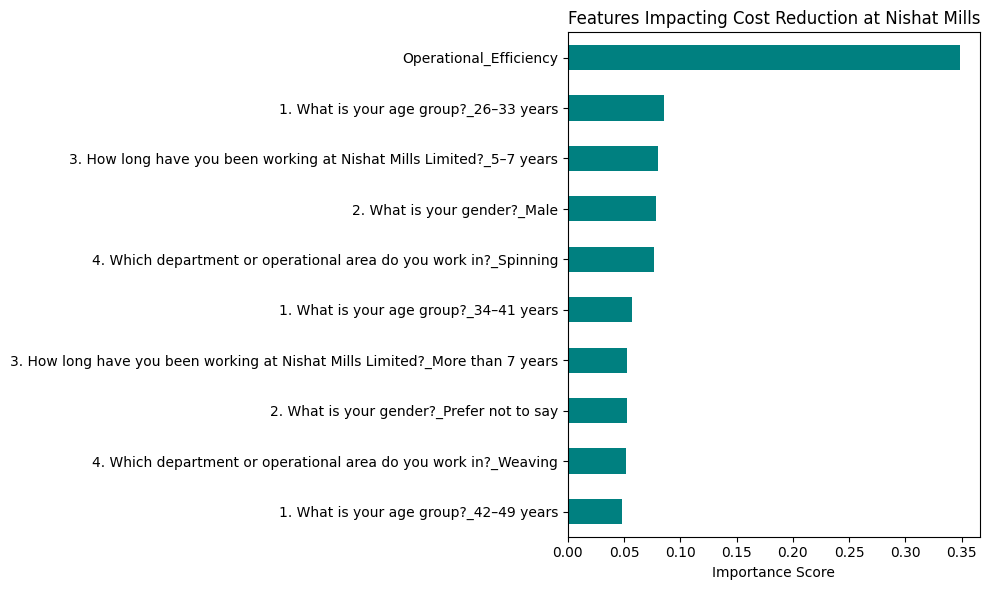

In [ ]:
# Implementation of Random Forest to Visualise feature impacting cost reduction

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")


importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh', color='teal')
plt.title('Features Impacting Cost Reduction at Nishat Mills')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

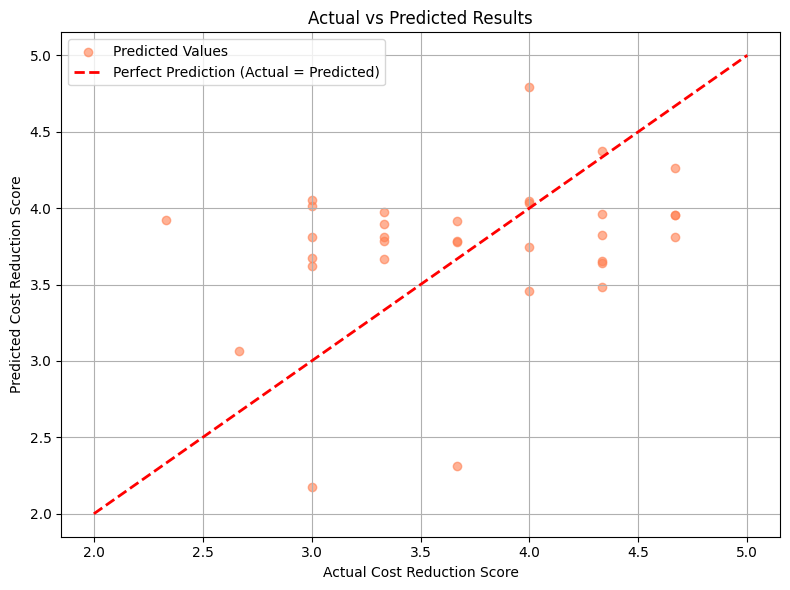

In [ ]:
# Visualization of Actual vs Predicted cost reduction plot using Random Forest model


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='coral', label='Predicted Values')

plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2, label='Perfect Prediction (Actual = Predicted)')

plt.xlabel('Actual Cost Reduction Score')
plt.ylabel('Predicted Cost Reduction Score')
plt.title('Actual vs Predicted Results')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

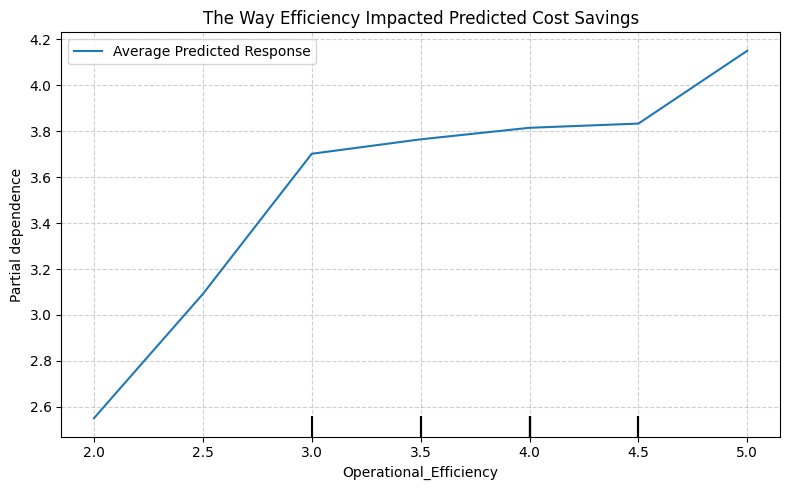

In [ ]:
#Visualisation of Efficiency impact on predicted cost savings


fig, ax = plt.subplots(figsize=(8, 5))

display = PartialDependenceDisplay.from_estimator(rf, X_train, features=['Operational_Efficiency'], ax=ax)

if display.lines_ is not None:
    display.lines_[0, 0].set_label('Average Predicted Response')

plt.legend(loc='best')

plt.title('The Way Efficiency Impacted Predicted Cost Savings')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()